# 1

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

url = 'https://www.mygov.in/corona-data/covid19-statewise-status/'
# Making a GET request
r = requests.get(url)

# print request object
print(r.url)

# print status code
print(r.status_code)

print(type(r))

print(r)

soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())


https://www.mygov.in/corona-data/covid19-statewise-status/
200
<class 'requests.models.Response'>
<Response [200]>
<!DOCTYPE html>
<html data-ng-app="site_stats_display" dir="ltr" lang="en">
 <head>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="app-id=1423088445" name="apple-itunes-app"/>
  <!--[if IE]><![endif]-->
  <!--[if IE]><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<![endif]-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <link href="https://www.mygov.in/sites/all/themes/mygov/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon">
    <meta content="MyGov, India, Government, Citizen Platform, Technology, Growth, Development, Citizen Engagement, Governance" name="keywords"/>
    <meta content="MyGov" name="generator"/>
    <link href="https://www.mygov.in/corona-data/covid19-statewise-status/" rel="canonical"/>
    <link href="https://www.mygov.in/node/287111/" rel="shortlink"/>
    <meta content="MyGov

In [2]:
import re
print(type(soup))
stateList = soup.find_all("div", class_=re.compile("field-collection-view clearfix view-mode-full.*"))
print(len(stateList))

datadict = {}
for state in stateList:
    l = state.contents[0].contents[1].contents

    for p in l:
        if isinstance(p, bs4.element.Tag):
            # print(type(p))
            # print(p)
            key = str(p.find('div', class_="field-label").text).strip().replace(':', '')
            
            if key.__contains__('Url'):
                continue

            value = str(p.find('div', class_="field-item even").text).strip()

            if not key in datadict:
                datadict[key] = []
            datadict[key].append(value)
    

<class 'bs4.BeautifulSoup'>
36


In [3]:
import pandas as pd

df = pd.DataFrame(datadict)
df.head()

,State Name,Total Confirmed,Cured/ Discharged/ Migrated,Death,State code,Last Confirmed Covid Cases,Last Cured Discharged,Last Death
0,Andaman and Nicobar,10766,10637,129,35,10766,10637,129
1,Andhra Pradesh,2340672,2325939,14733,28,2340672,2325939,14733
2,Arunachal Pradesh,67046,66748,296,12,67046,66748,296
3,Assam,746150,738108,8035,18,746150,738108,8035
4,Bihar,855260,842942,12314,10,855260,842942,12314


In [4]:
df.rename(columns={'State Name':'State'}, inplace=True)
df.rename(columns={'Total Confirmed':'Affected'}, inplace=True)
df.rename(columns={'Cured/ Discharged/ Migrated':'Recovered'}, inplace=True)
df.rename(columns={'Death':'Deaths'}, inplace=True)
df.rename(columns={'Last Confirmed Covid Cases':'Active'}, inplace=True)

In [5]:
data = df[['State','Affected','Deaths','Recovered','Active']]
data.head()

,State,Affected,Deaths,Recovered,Active
0,Andaman and Nicobar,10766,129,10637,10766
1,Andhra Pradesh,2340672,14733,2325939,2340672
2,Arunachal Pradesh,67046,296,66748,67046
3,Assam,746150,8035,738108,746150
4,Bihar,855260,12314,842942,855260


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      36 non-null     object
 1   Affected   36 non-null     object
 2   Deaths     36 non-null     object
 3   Recovered  36 non-null     object
 4   Active     36 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [7]:
data['Affected'] = data['Affected'].astype(int)
data['Deaths'] = data['Deaths'].astype(int)
data['Recovered'] = data['Recovered'].astype(int)
data['Active'] = data['Active'].astype(int)

C:\Users\rohan\AppData\Local\Temp\ipykernel_12740\787583016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Affected'] = data['Affected'].astype(int)
C:\Users\rohan\AppData\Local\Temp\ipykernel_12740\787583016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Deaths'] = data['Deaths'].astype(int)
C:\Users\rohan\AppData\Local\Temp\ipykernel_12740\787583016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [8]:
data.dtypes

State        object
Affected      int32
Deaths        int32
Recovered     int32
Active        int32
dtype: object

In [9]:
import matplotlib.pyplot as plt

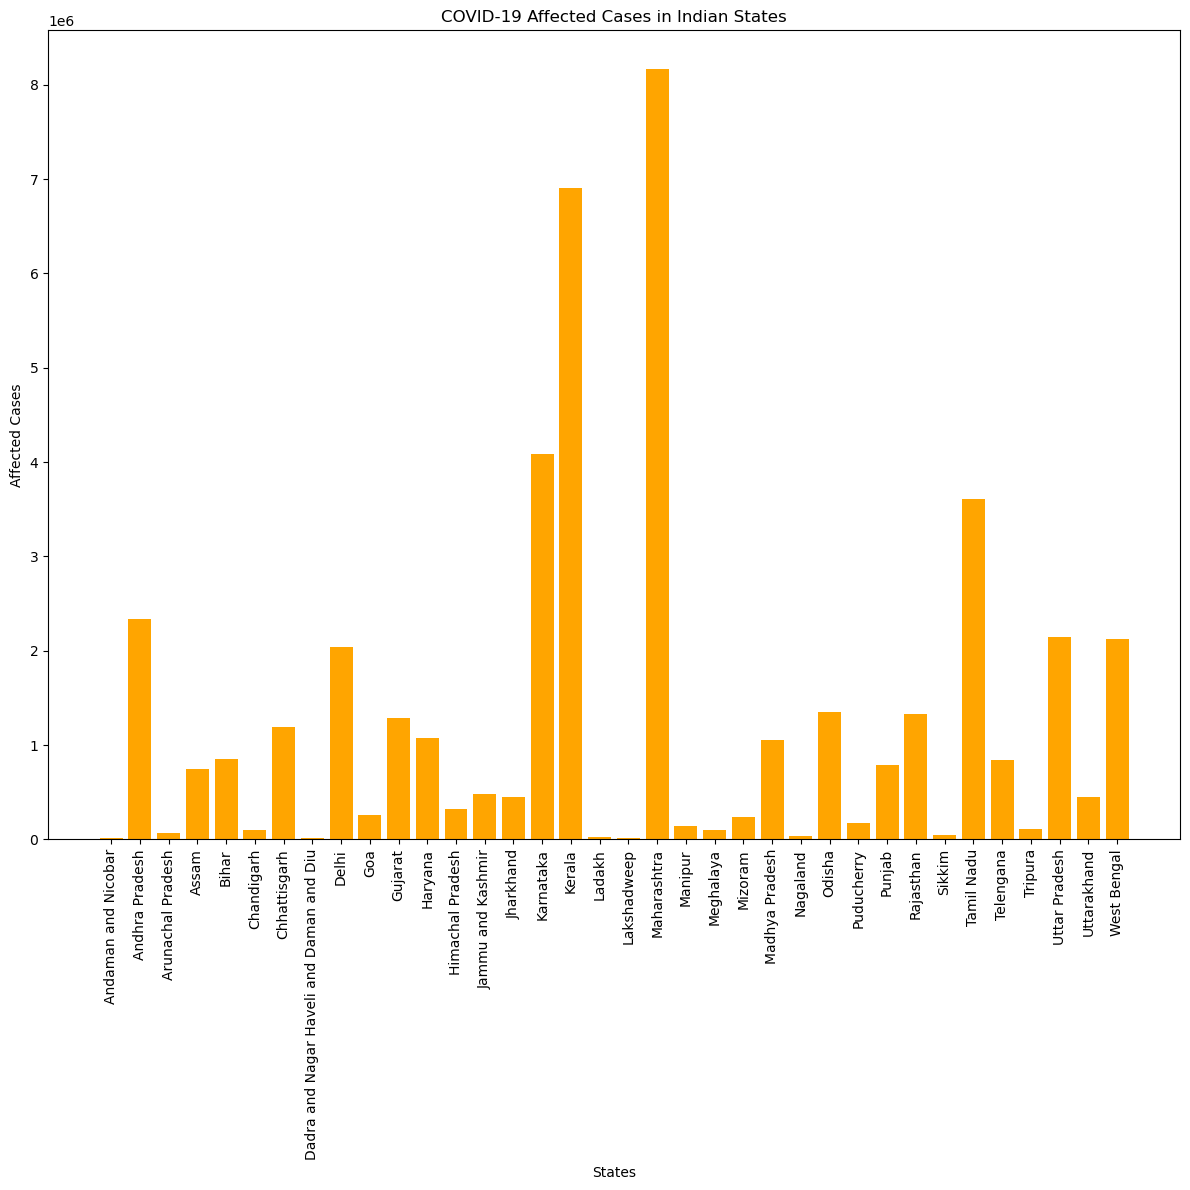

In [10]:
plt.figure(figsize=(12, 12))
plt.bar(data['State'], data['Affected'], color="orange")
plt.title("COVID-19 Affected Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Affected Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

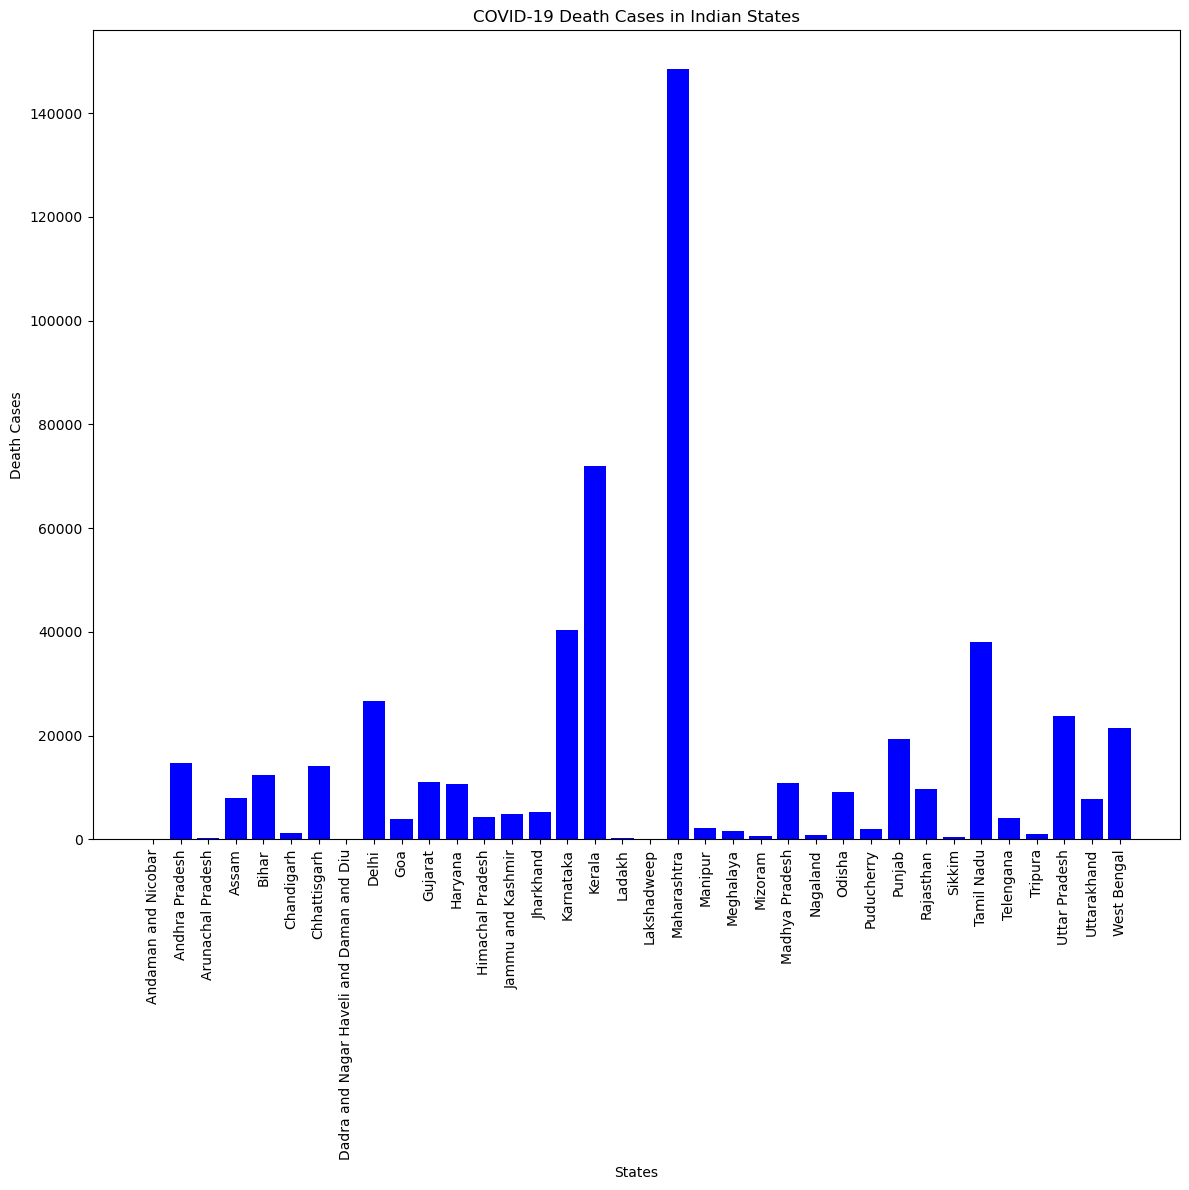

In [11]:
plt.figure(figsize=(12, 12))
plt.bar(data['State'], data['Deaths'], color="blue")
plt.title("COVID-19 Death Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Death Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

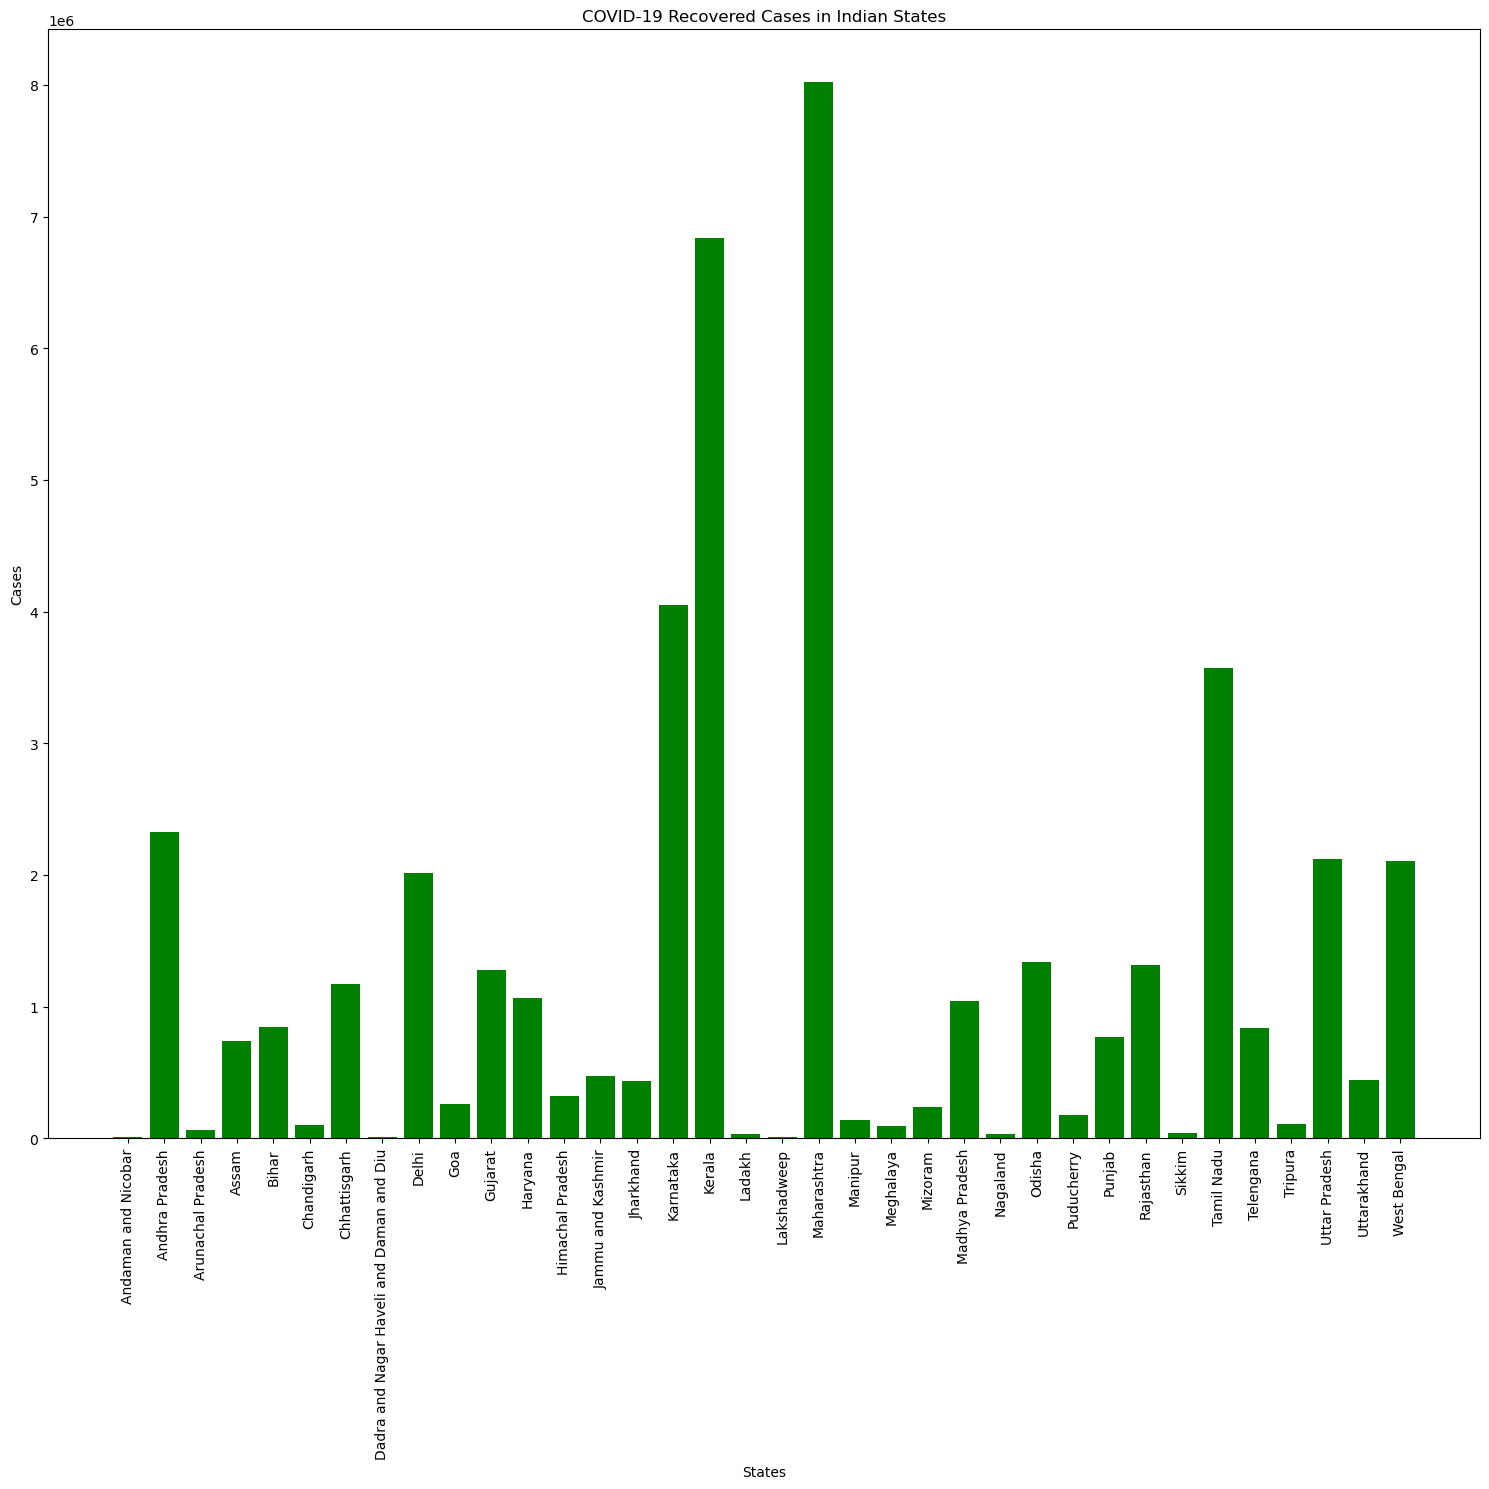

In [12]:
plt.figure(figsize=(15, 15))
plt.bar(data['State'], data['Recovered'], label="Recovered", color="green")
plt.title("COVID-19 Recovered Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

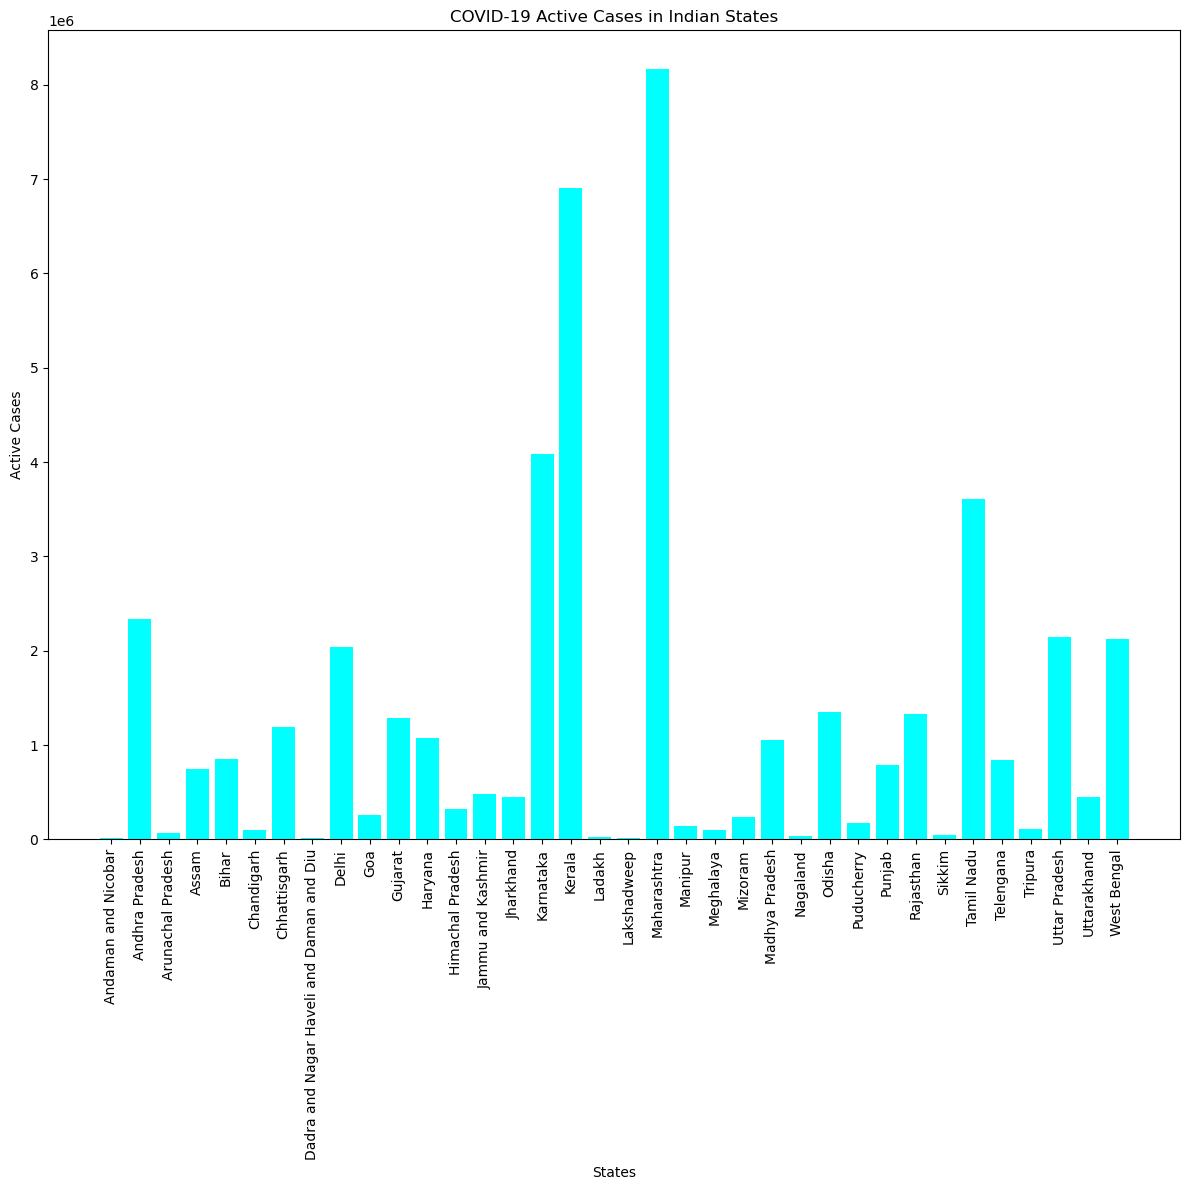

In [13]:
plt.figure(figsize=(12, 12))
plt.bar(data['State'], data['Active'], color="cyan")
plt.title("COVID-19 Active Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Active Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2

In [14]:
import requests
import bs4
from bs4 import BeautifulSoup

url = 'https://api.covid19india.org/'
# Making a GET request
r = requests.get(url)

# print request object
print(r.url)

# print status code
print(r.status_code)

print(type(r))

print(r)

soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())


https://data.covid19india.org/
200
<class 'requests.models.Response'>
<Response [200]>
<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Begin Jekyll SEO tag v2.7.1 -->
  <title>
   COVID19-India API | data
  </title>
  <meta content="Jekyll v3.9.0" name="generator">
   <meta content="COVID19-India API" property="og:title">
    <meta content="en_US" property="og:locale">
     <link href="https://data.covid19india.org/" rel="canonical"/>
     <meta content="https://data.covid19india.org/" property="og:url"/>
     <meta content="data" property="og:site_name"/>
     <meta content="summary" name="twitter:card"/>
     <meta content="COVID19-India API" property="twitter:title"/>
     <script type="application/ld+json">
      {"url":"https://data.covid19india.org/","@type":"WebSite","headline":"COVID19-India API","name":"data","@context":"

In [15]:
import pandas as pd
import requests

url = 'https://data.covid19india.org/csv/latest/state_wise.csv'

r = requests.get(url)

if r.status_code == 200:
    df = pd.read_csv(url)
    data1 = pd.DataFrame(df)

    print(data1)

else:
    print("Failed to retrieve data from the URL.")


                                       State  Confirmed  Recovered  Deaths  \
0                                      Total   34285612   33661339  458470   
1                Andaman and Nicobar Islands       7651       7518     129   
2                             Andhra Pradesh    2066450    2047722   14373   
3                          Arunachal Pradesh      55155      54774     280   
4                                      Assam     610645     600974    5997   
5                                      Bihar     726098     716390    9661   
6                                 Chandigarh      65351      64495     820   
7                               Chhattisgarh    1006052     992159   13577   
8   Dadra and Nagar Haveli and Daman and Diu      10681      10644       4   
9                                      Delhi    1439870    1414431   25091   
10                                       Goa     178108     174392    3364   
11                                   Gujarat     826577     8162

In [16]:
data1.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,34285612,33661339,458470,152606,13/08/2021 23:27:22,13197,TT,0,0,0,NaN
1,Andaman and Nicobar Islands,7651,7518,129,4,13/08/2021 23:27:22,0,AN,0,0,0,NaN
2,Andhra Pradesh,2066450,2047722,14373,4355,13/08/2021 23:27:22,0,AP,0,0,0,NaN
3,Arunachal Pradesh,55155,54774,280,101,13/08/2021 23:27:22,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
4,Assam,610645,600974,5997,2327,13/08/2021 23:27:22,1347,AS,0,0,0,[Jan 1]: 1347 cases i.e Covid +'tive patients ...


In [17]:
data1.rename(columns={'Confirmed':'Affected'}, inplace=True)

In [18]:
data1 = data1[['State','Affected','Deaths','Recovered','Active']]
data1.head()

,State,Affected,Deaths,Recovered,Active
0,Total,34285612,458470,33661339,152606
1,Andaman and Nicobar Islands,7651,129,7518,4
2,Andhra Pradesh,2066450,14373,2047722,4355
3,Arunachal Pradesh,55155,280,54774,101
4,Assam,610645,5997,600974,2327


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      38 non-null     object
 1   Affected   38 non-null     int64 
 2   Deaths     38 non-null     int64 
 3   Recovered  38 non-null     int64 
 4   Active     38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


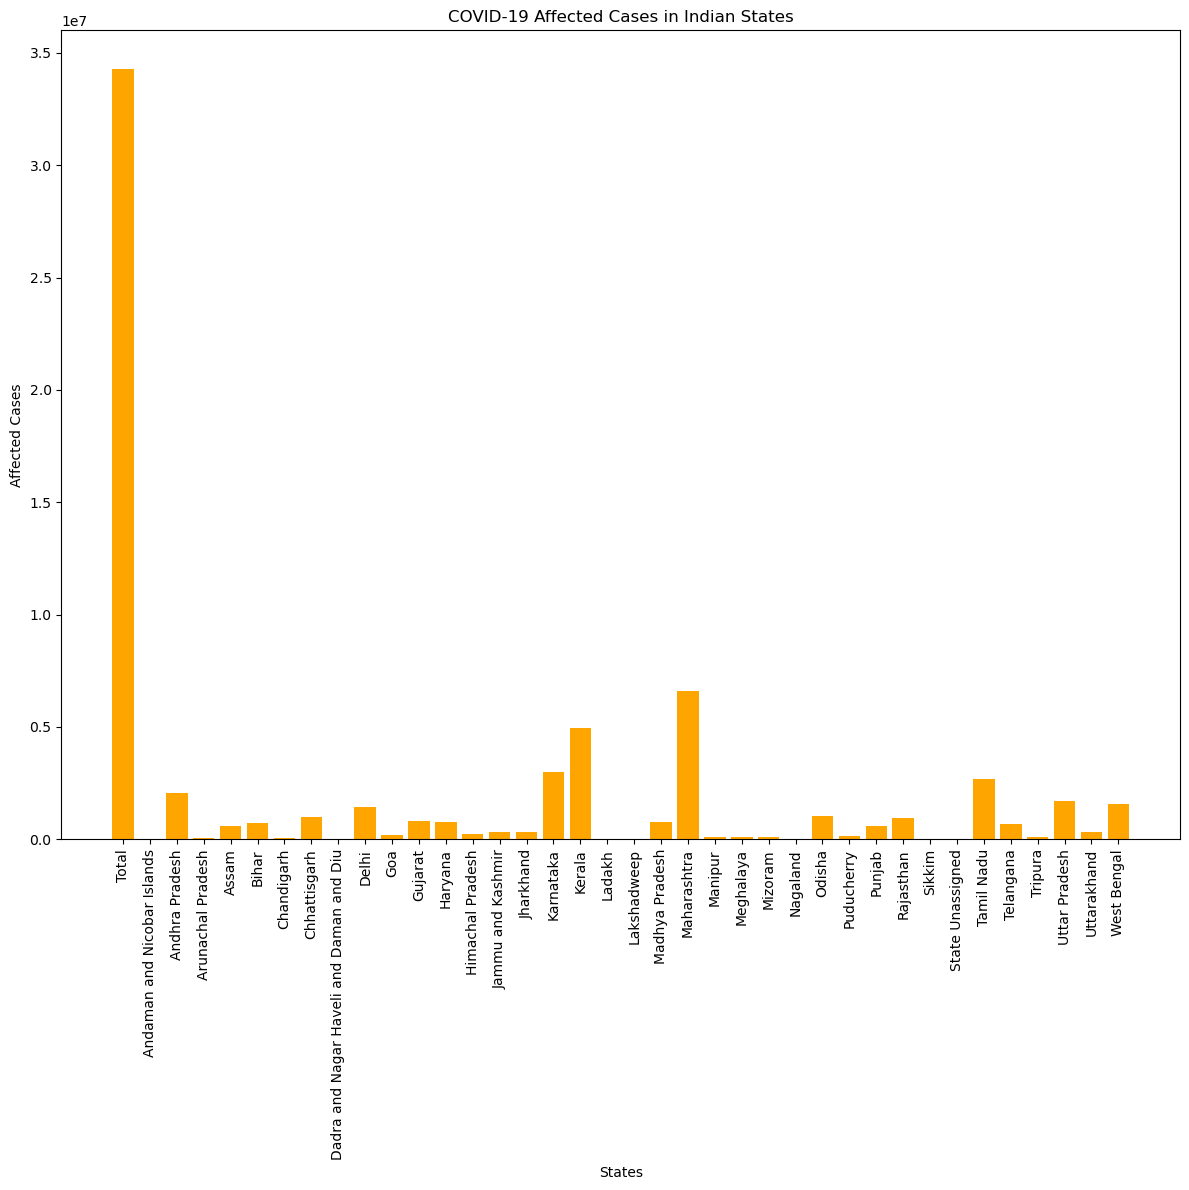

In [20]:
plt.figure(figsize=(12, 12))
plt.bar(data1['State'], data1['Affected'], color="orange")
plt.title("COVID-19 Affected Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Affected Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

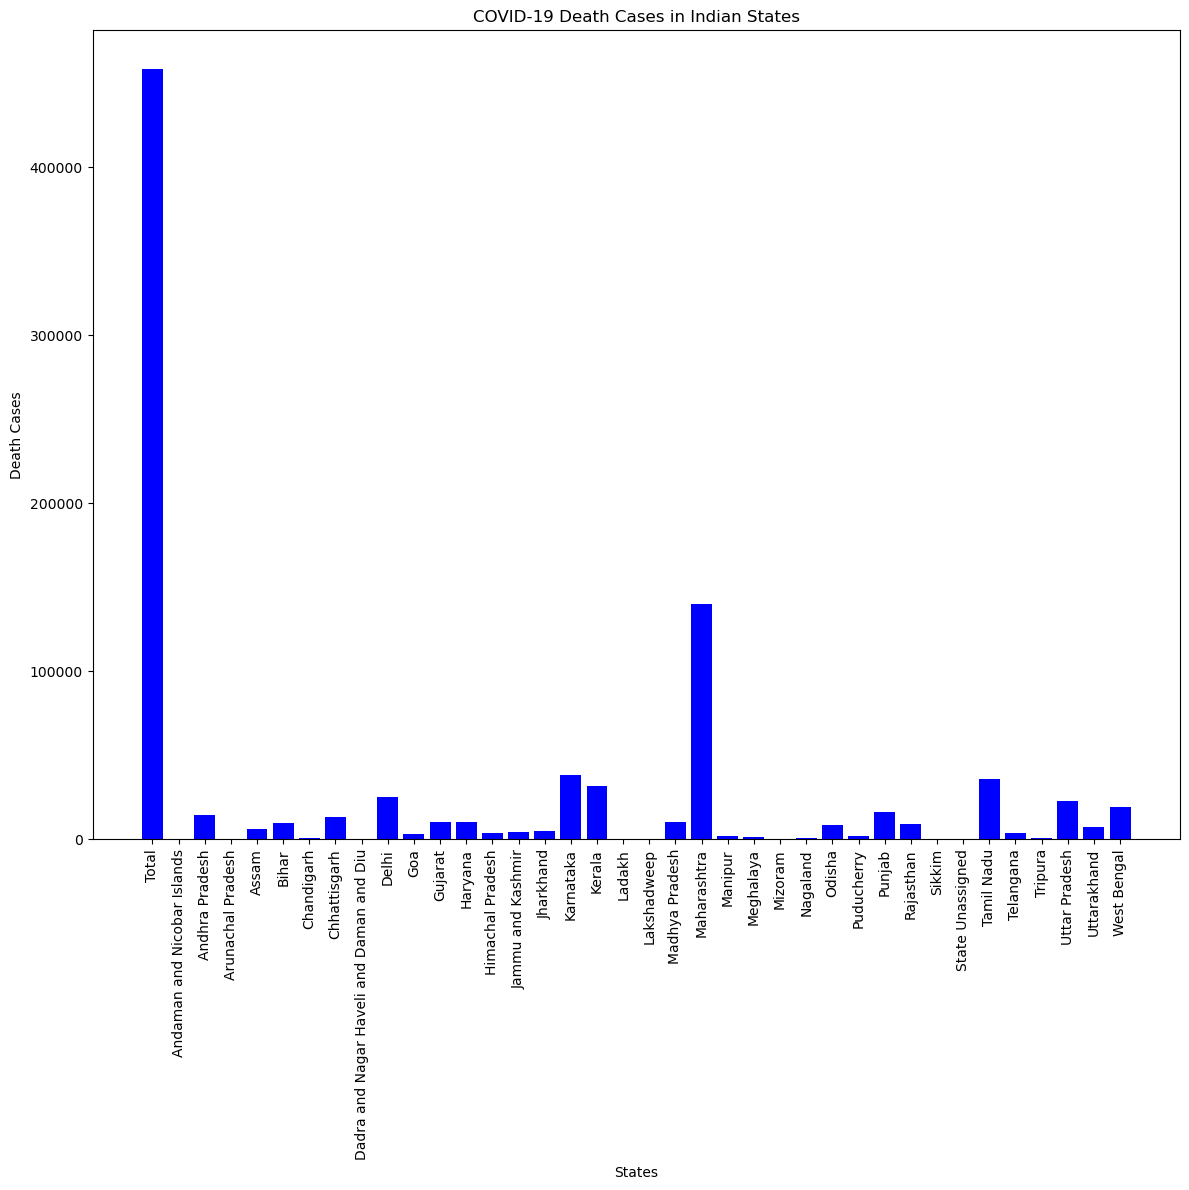

In [21]:
plt.figure(figsize=(12, 12))
plt.bar(data1['State'], data1['Deaths'], color="blue")
plt.title("COVID-19 Death Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Death Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

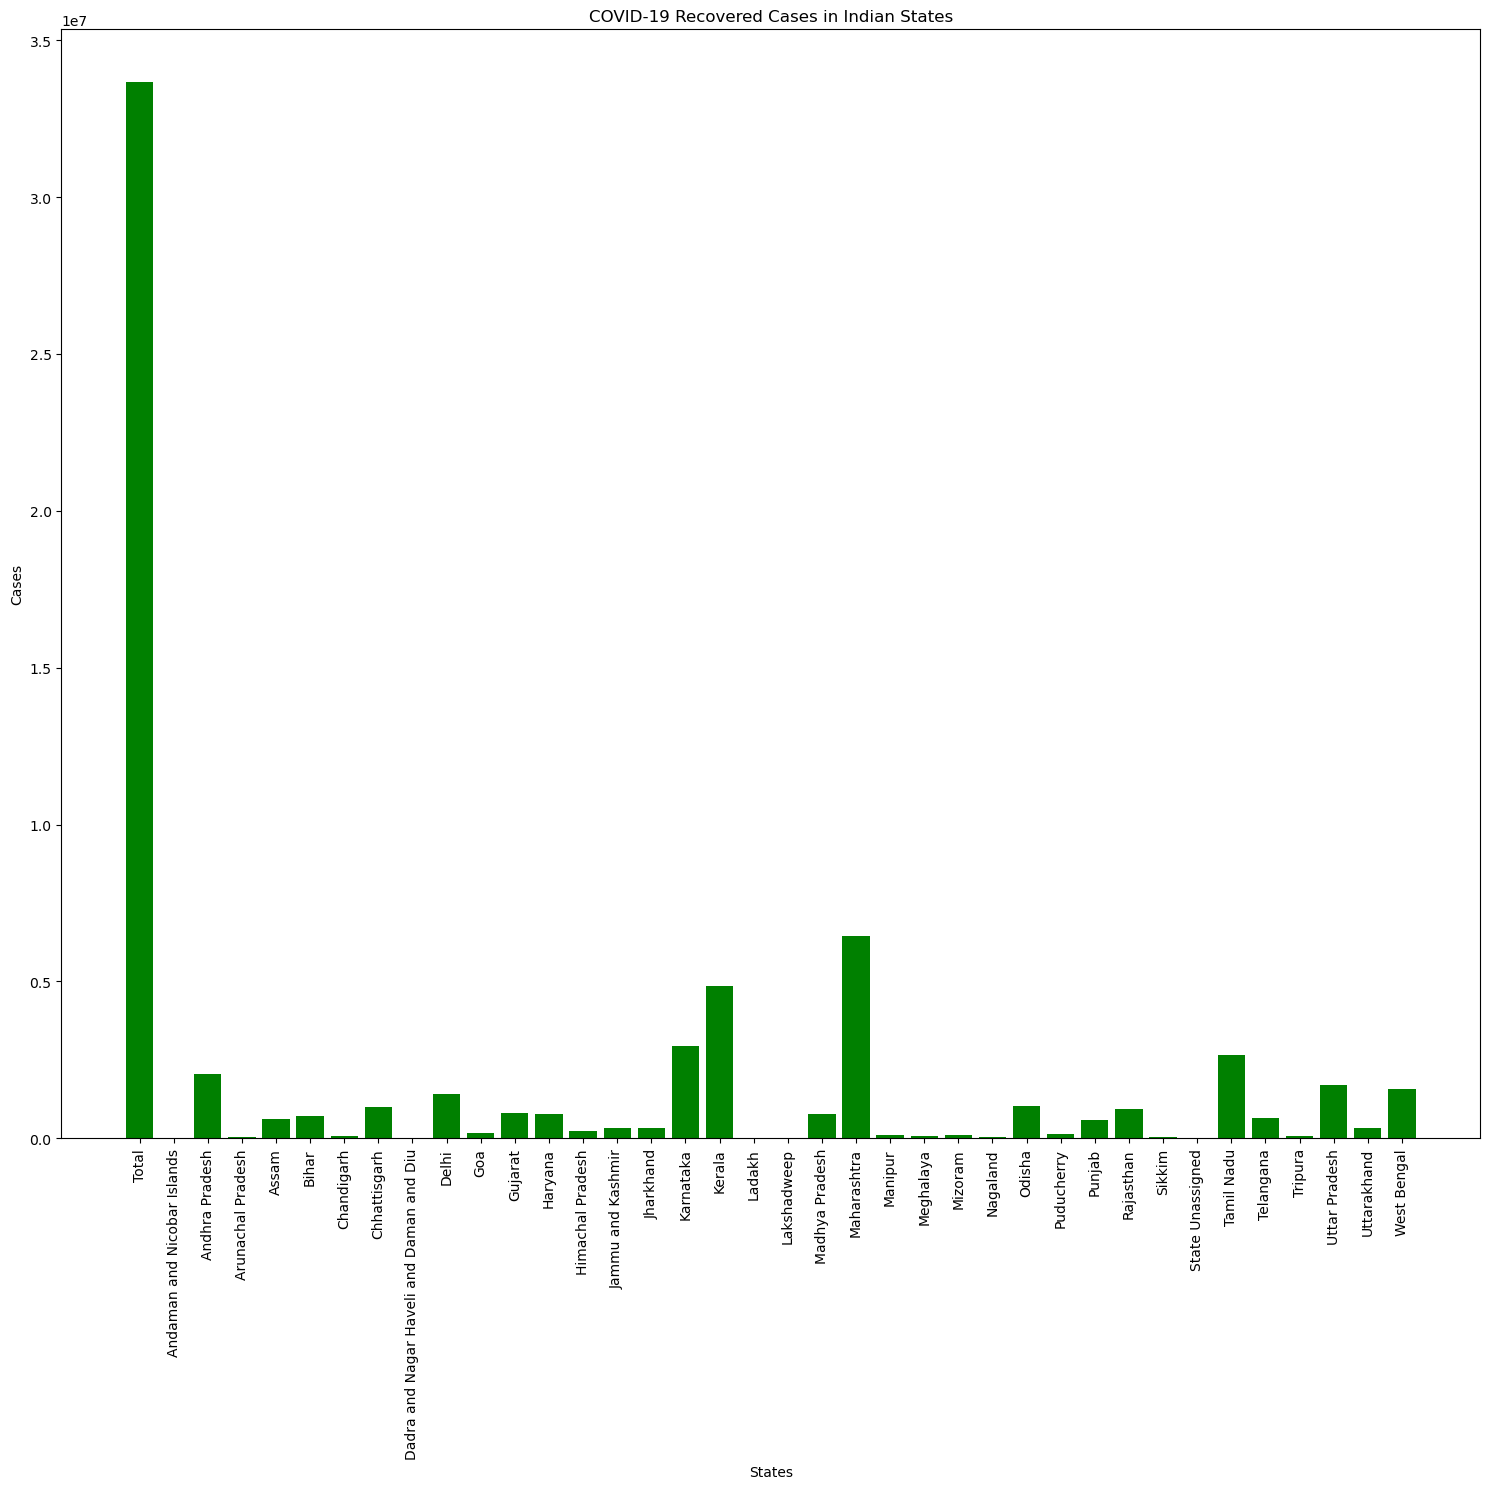

In [22]:
plt.figure(figsize=(15, 15))
plt.bar(data1['State'], data1['Recovered'], label="Recovered", color="green")
plt.title("COVID-19 Recovered Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

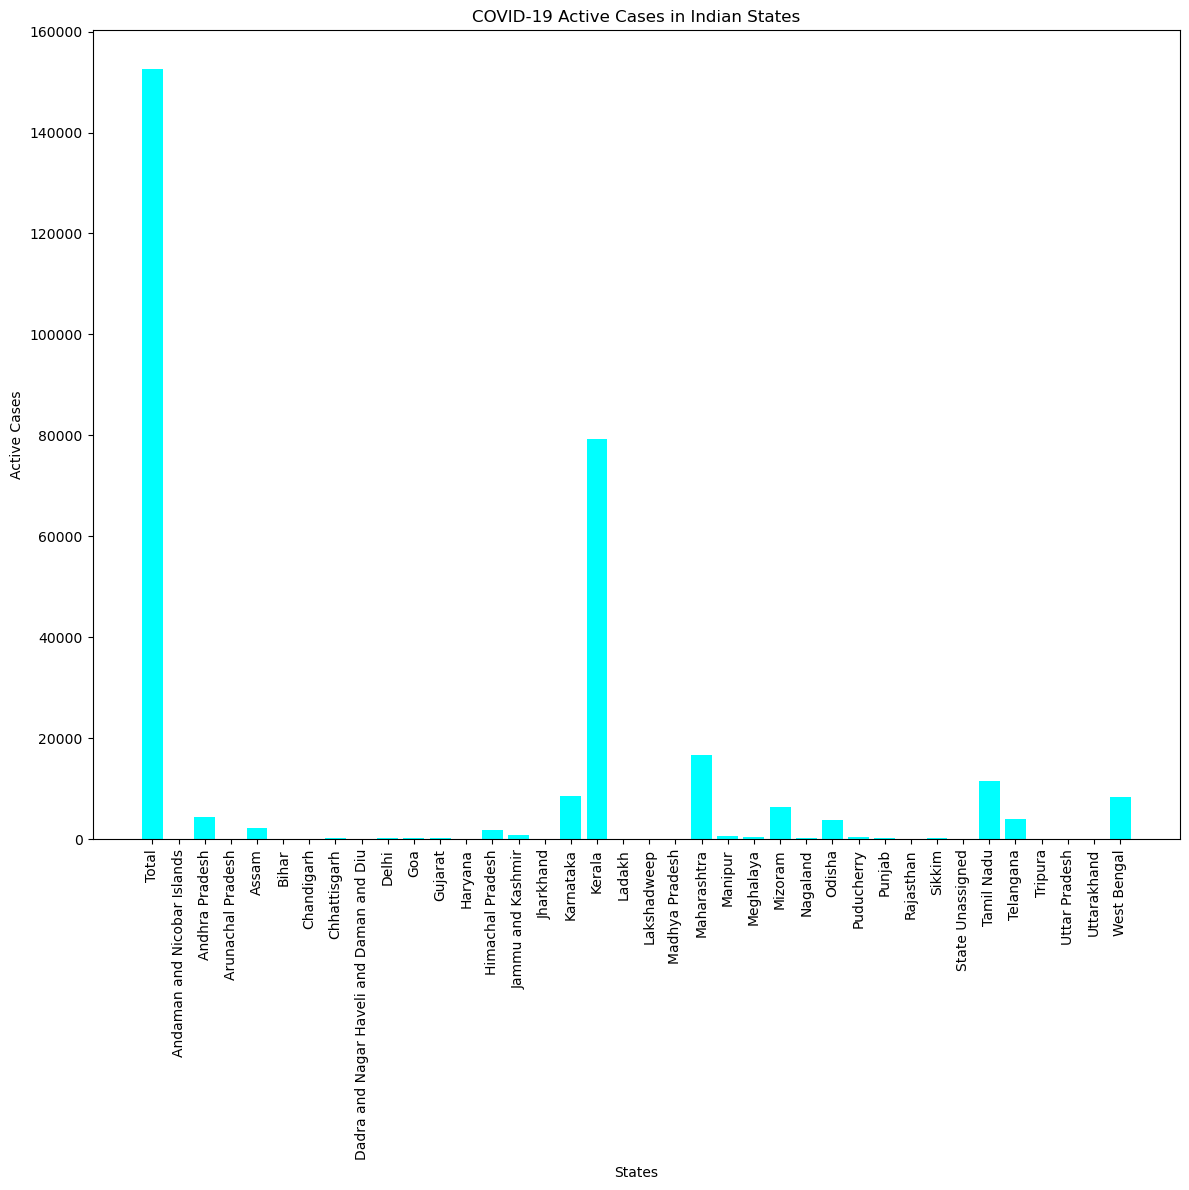

In [23]:
plt.figure(figsize=(12, 12))
plt.bar(data1['State'], data1['Active'], color="cyan")
plt.title("COVID-19 Active Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Active Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup

url = 'https://prsindia.org/covid-19/cases'
# Making a GET request
r = requests.get(url)

# print request object
print(r.url)

# print status code
print(r.status_code)

print(type(r))

print(r)

soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())


https://prsindia.org/covid-19/cases
200
<class 'requests.models.Response'>
<Response [200]>
<!DOCTYPE html>
<html lang="en-US" style="overflow-y: scroll;">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Number of Cases
  </title>
  <meta content="COVID-19" name="article:tag"/>
  <meta content="Coronavirus disease (COVID-19) pandemic Cases in india" name="article:tag"/>
  <meta content="covid 19 Cases in india" name="article:tag"/>
  <meta content="covid 19 Cases states wise in india" name="article:tag"/>
  <meta content="covid 19 Cases states wise in india" name="article:tag"/>
  <meta content="PRS Legislative Research (www.prsindia.org)" name="generator"/>
  <meta content="COVID-19, covid 19 Cases in india, Coronavirus disease (COVID-19) pandemic Cases in india, covid 19 Cases states wise in india, covid 19 Cases states wise in india" name="keywords"/>
  <me

In [24]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://prsindia.org/covid-19/cases"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"class": "table"})

table_body = table.find("tbody")
rows = table_body.find_all("tr")

states = []
affected_cases = []
death_cases = []
recovered_cases = []
active_cases = []

for row in rows:
    columns = row.find_all("td")
    state = columns[1].text.strip()
    affected = int(columns[2].text.strip().replace(",", ""))
    deaths = int(columns[5].text.strip().replace(",", ""))
    recovered = int(columns[4].text.strip().replace(",", ""))
    active = int(columns[3].text.strip().replace(",", ""))

    states.append(state)
    affected_cases.append(affected)
    death_cases.append(deaths)
    recovered_cases.append(recovered)
    active_cases.append(active)

df2 = {
    "State": states,
    "Affected Cases": affected_cases,
    "Death Cases": death_cases,
    "Recovered Cases": recovered_cases,
    "Active Cases": active_cases,
}
data2 = pd.DataFrame(df2)

print(data2)

                                       State  Affected Cases  Death Cases  \
0                Andaman and Nicobar Islands           10157          129   
1                             Andhra Pradesh         2321379        14731   
2                          Arunachal Pradesh           64518          296   
3                                      Assam          724788         7988   
4                                      Bihar          832581        12259   
5                                 Chandigarh           93785         1165   
6                               Chhattisgarh         1154179        14036   
7   Dadra and Nagar Haveli and Daman and Diu           11474            4   
8                                      Delhi         1934009        26261   
9                                        Goa          248540         3838   
10                                   Gujarat         1231483        10946   
11                                   Haryana         1015501        10624   

In [25]:
data2.head()

,State,Affected Cases,Death Cases,Recovered Cases,Active Cases
0,Andaman and Nicobar Islands,10157,129,9986,42
1,Andhra Pradesh,2321379,14731,2305893,755
2,Arunachal Pradesh,64518,296,64218,4
3,Assam,724788,7988,716405,395
4,Bihar,832581,12259,819388,934


In [26]:
data2.rename(columns={'Affected Cases':'Affected'}, inplace=True)
data2.rename(columns={'Death Cases':'Deaths'}, inplace=True)
data2.rename(columns={'Recovered Cases':'Recovered'}, inplace=True)
data2.rename(columns={'Active Cases':'Active'}, inplace=True)

In [27]:
data2 = data2[['State','Affected','Deaths','Recovered','Active']]
data2.head()

,State,Affected,Deaths,Recovered,Active
0,Andaman and Nicobar Islands,10157,129,9986,42
1,Andhra Pradesh,2321379,14731,2305893,755
2,Arunachal Pradesh,64518,296,64218,4
3,Assam,724788,7988,716405,395
4,Bihar,832581,12259,819388,934


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      36 non-null     object
 1   Affected   36 non-null     int64 
 2   Deaths     36 non-null     int64 
 3   Recovered  36 non-null     int64 
 4   Active     36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


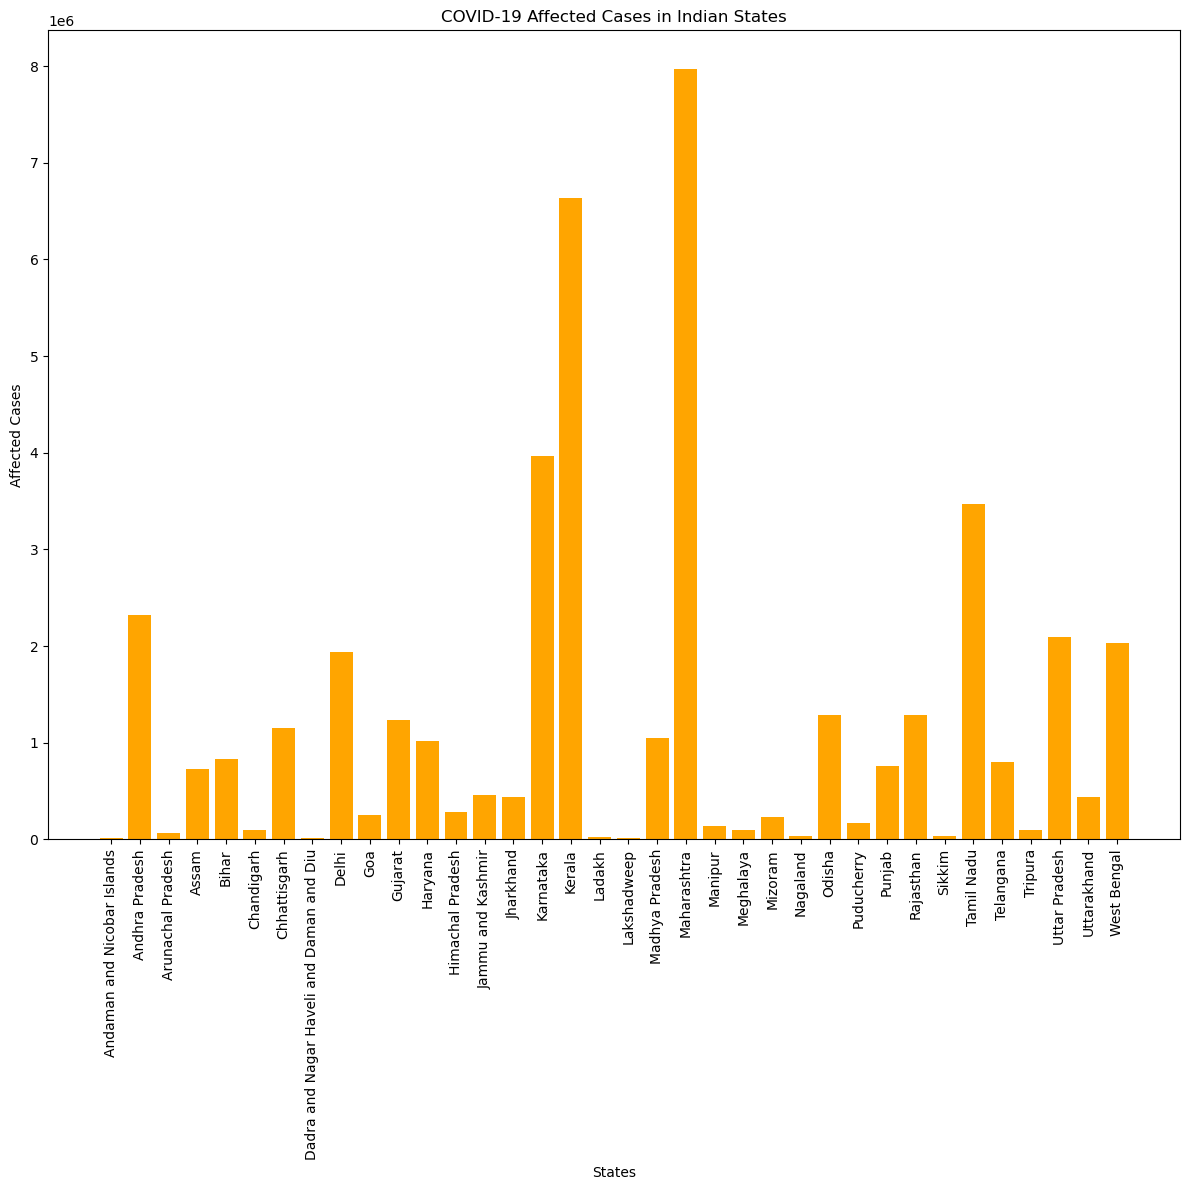

In [29]:
plt.figure(figsize=(12, 12))
plt.bar(data2['State'], data2['Affected'], color="orange")
plt.title("COVID-19 Affected Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Affected Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

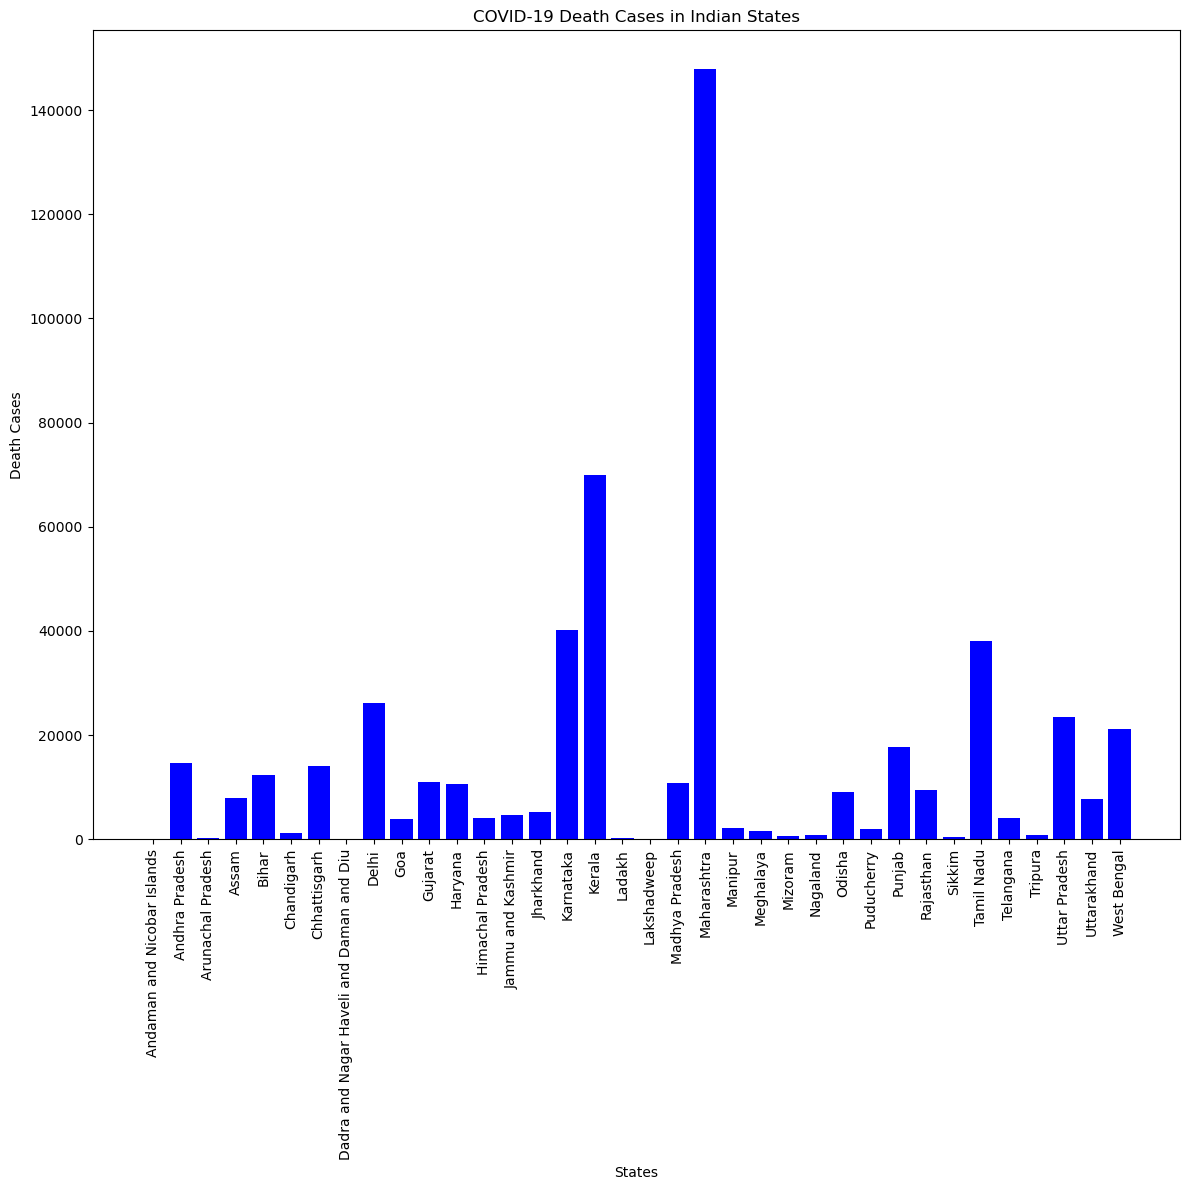

In [30]:
plt.figure(figsize=(12, 12))
plt.bar(data2['State'], data2['Deaths'], color="blue")
plt.title("COVID-19 Death Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Death Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

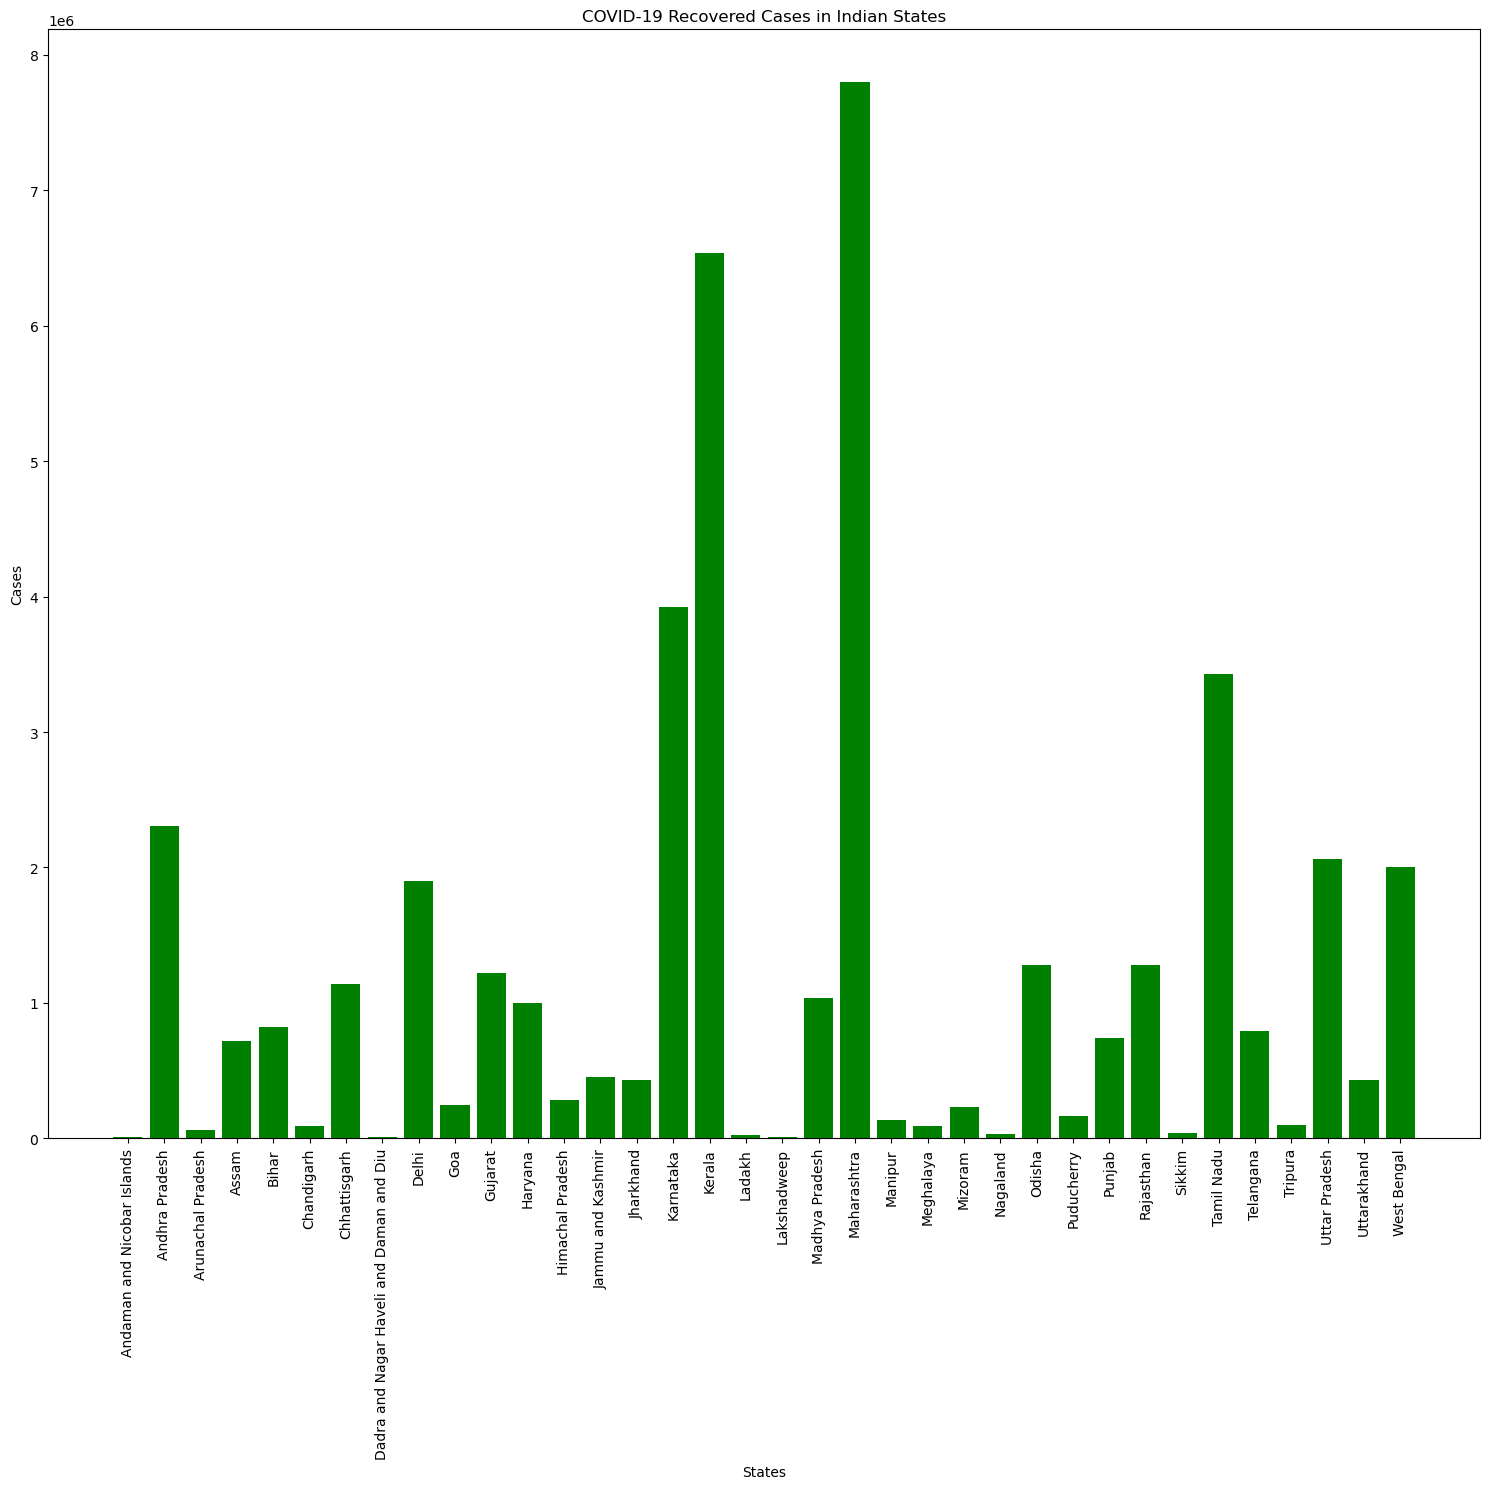

In [31]:
plt.figure(figsize=(15, 15))
plt.bar(data2['State'], data2['Recovered'], label="Recovered", color="green")
plt.title("COVID-19 Recovered Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

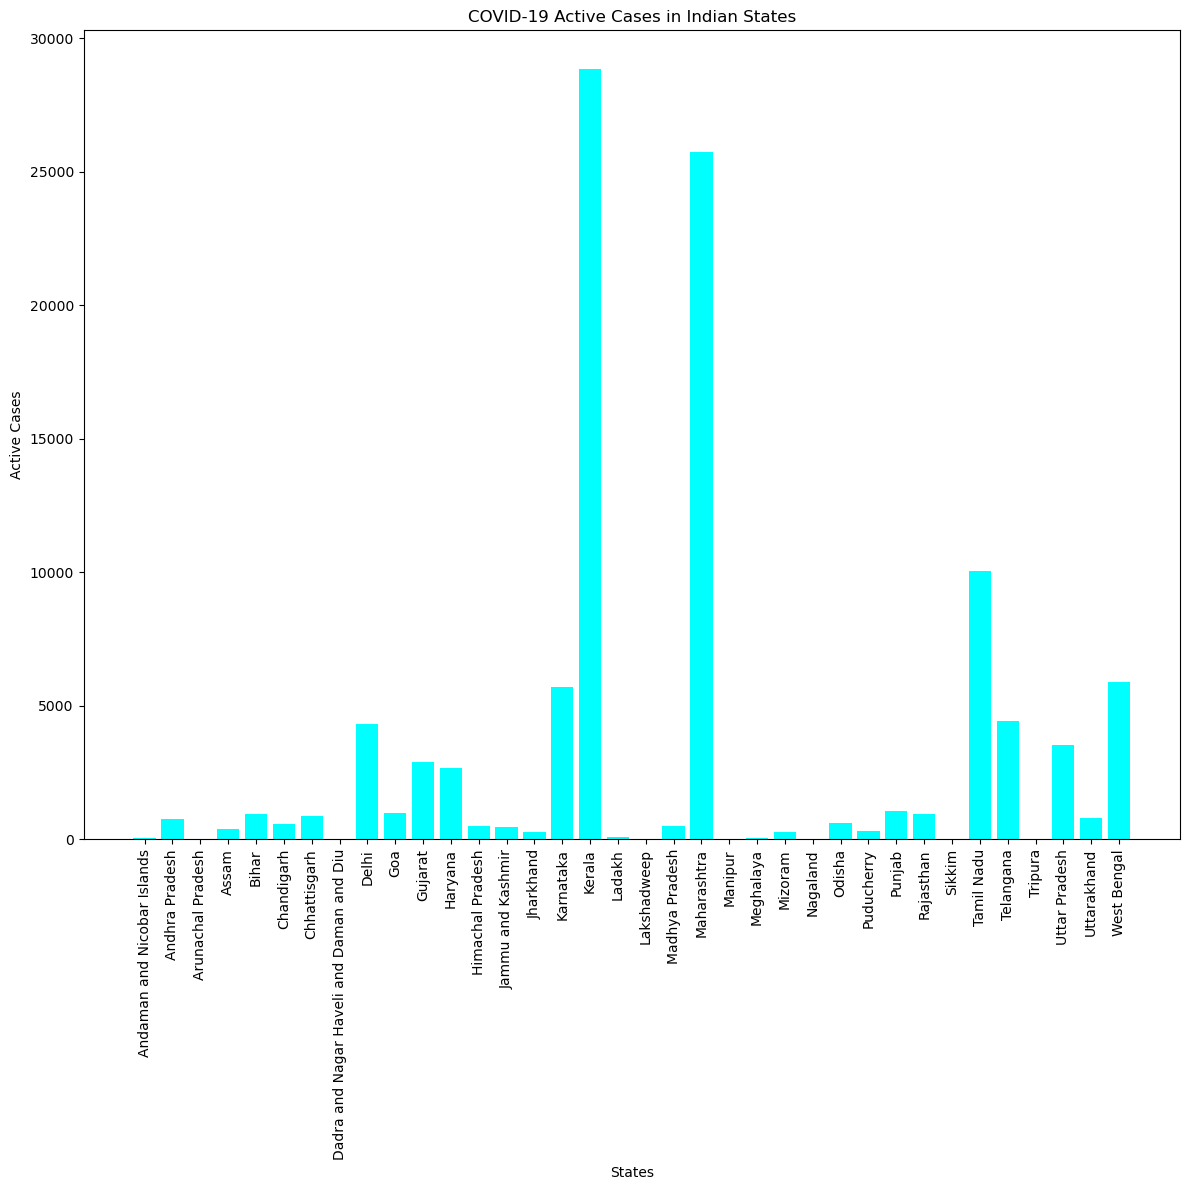

In [32]:
plt.figure(figsize=(12, 12))
plt.bar(data2['State'], data2['Active'], color="cyan")
plt.title("COVID-19 Active Cases in Indian States")
plt.xlabel("States")
plt.ylabel("Active Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()